# Quantifying the Relationship between Features in Iris Dataset 

#### <font color="deeppink">Note:</font>  
Python code within these Jupyter Notebooks should not be subjected to the scrutiny of ...  
* Use of code modularization with functions  
* Use of Error Handling  
* Use of correct variable/function names  

These code cells are for the exploration/experimentation of new python features I did not work with before.  
*While the final script at end of each stage should be subjected to this scrutiny*

In previous notebook I used scatter plots give us subjective visual patterns for the relationships between Iris features.
This does not *quantify* how good a linear fit maybe. To do this I will apply further statistical measures.
In particular wI will apply **Trendline Fit / Regression Analysis**

***
I will first begin with a single plot of the feature pair with (what I consider) the strongest linear correlation:
* Petal Width Vs Petal Length   

I will apply polyfit across 3 species/classes of Iris

How to apply polyfit in Numpy:  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html  
https://www.scaler.com/topics/numpy-polyfit/

To add a polyfit line we must   
1. call numpy.polyfit() to generate coefficients
2. Create a polynomial object using the coefficients
3.  Generate both x and y values for the fitted polynomial curve


Based on my subjective analysis of the scatter plots of previous notebook/stage, it would appear that the relationship between Petal Width Vs Petal Length feature is mainly a linear (straight-line) relationship  
https://set.kuleuven.be/voorkennis/zc-en/prep/veeltermen/veeltermen_eerstegraad  
https://en.wikipedia.org/wiki/Degree_of_a_polynomial



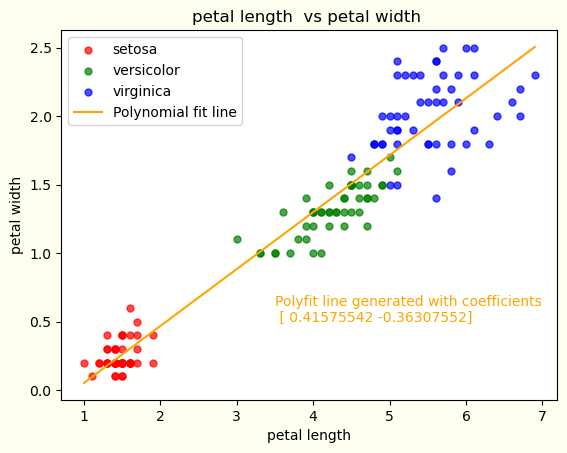

In [1]:
#import required modules 
import numpy as np
import pandas as pd
from sklearn import datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns


#load the Iris Dataset
ds_iris = ds.load_iris()

fig, ax = plt.subplots()  # 'fig' is the figure, 'ax' is the axes

# Define the colors for the species
colors = ['red', 'green', 'blue']  # Color for Setosa, Versicolor, and Virginica

x_iris = ds_iris.data
y_iris = ds_iris.target
coefficients = np.polyfit(x_iris[:,2], x_iris[:,3], 1)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
x_fit = np.linspace(min(x_iris[:,2]), max(x_iris[:,2]), 2)
y_fit = polynomial(x_fit)

#plot scatter plot
# Plot each species with different colors
for i in range(3):
    ax.scatter(x_iris[y_iris == i, 2],  # Petal length (x-axis)
                x_iris[y_iris == i, 3],  # Petal width (y-axis)
                color=colors[i],  # Color for the species
                label=ds_iris.target_names[i],  # Label for the species
                alpha=0.7,  # Set transparency
                marker = '.',  # dot
                s=100)  # Size of the points


# Plot the polynomial fit line
ax.plot(x_fit, y_fit, color='orange', label='Polynomial fit line')

#Axis labels, title, annotation, and background color
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title(f'{ds_iris.feature_names[2].replace('(cm)', '')} vs {ds_iris.feature_names[3].replace('(cm)', '')}')
ax.annotate(f'Polyfit line generated with coefficients\n {coefficients}', xy=(3.5, 0.5), color='orange')
ax.legend()
fig.set_facecolor('ivory')
plt.show()

***
### Lets apply this to a full grid of Iris feature combinations ....
Ployfit line will applied across 3 species

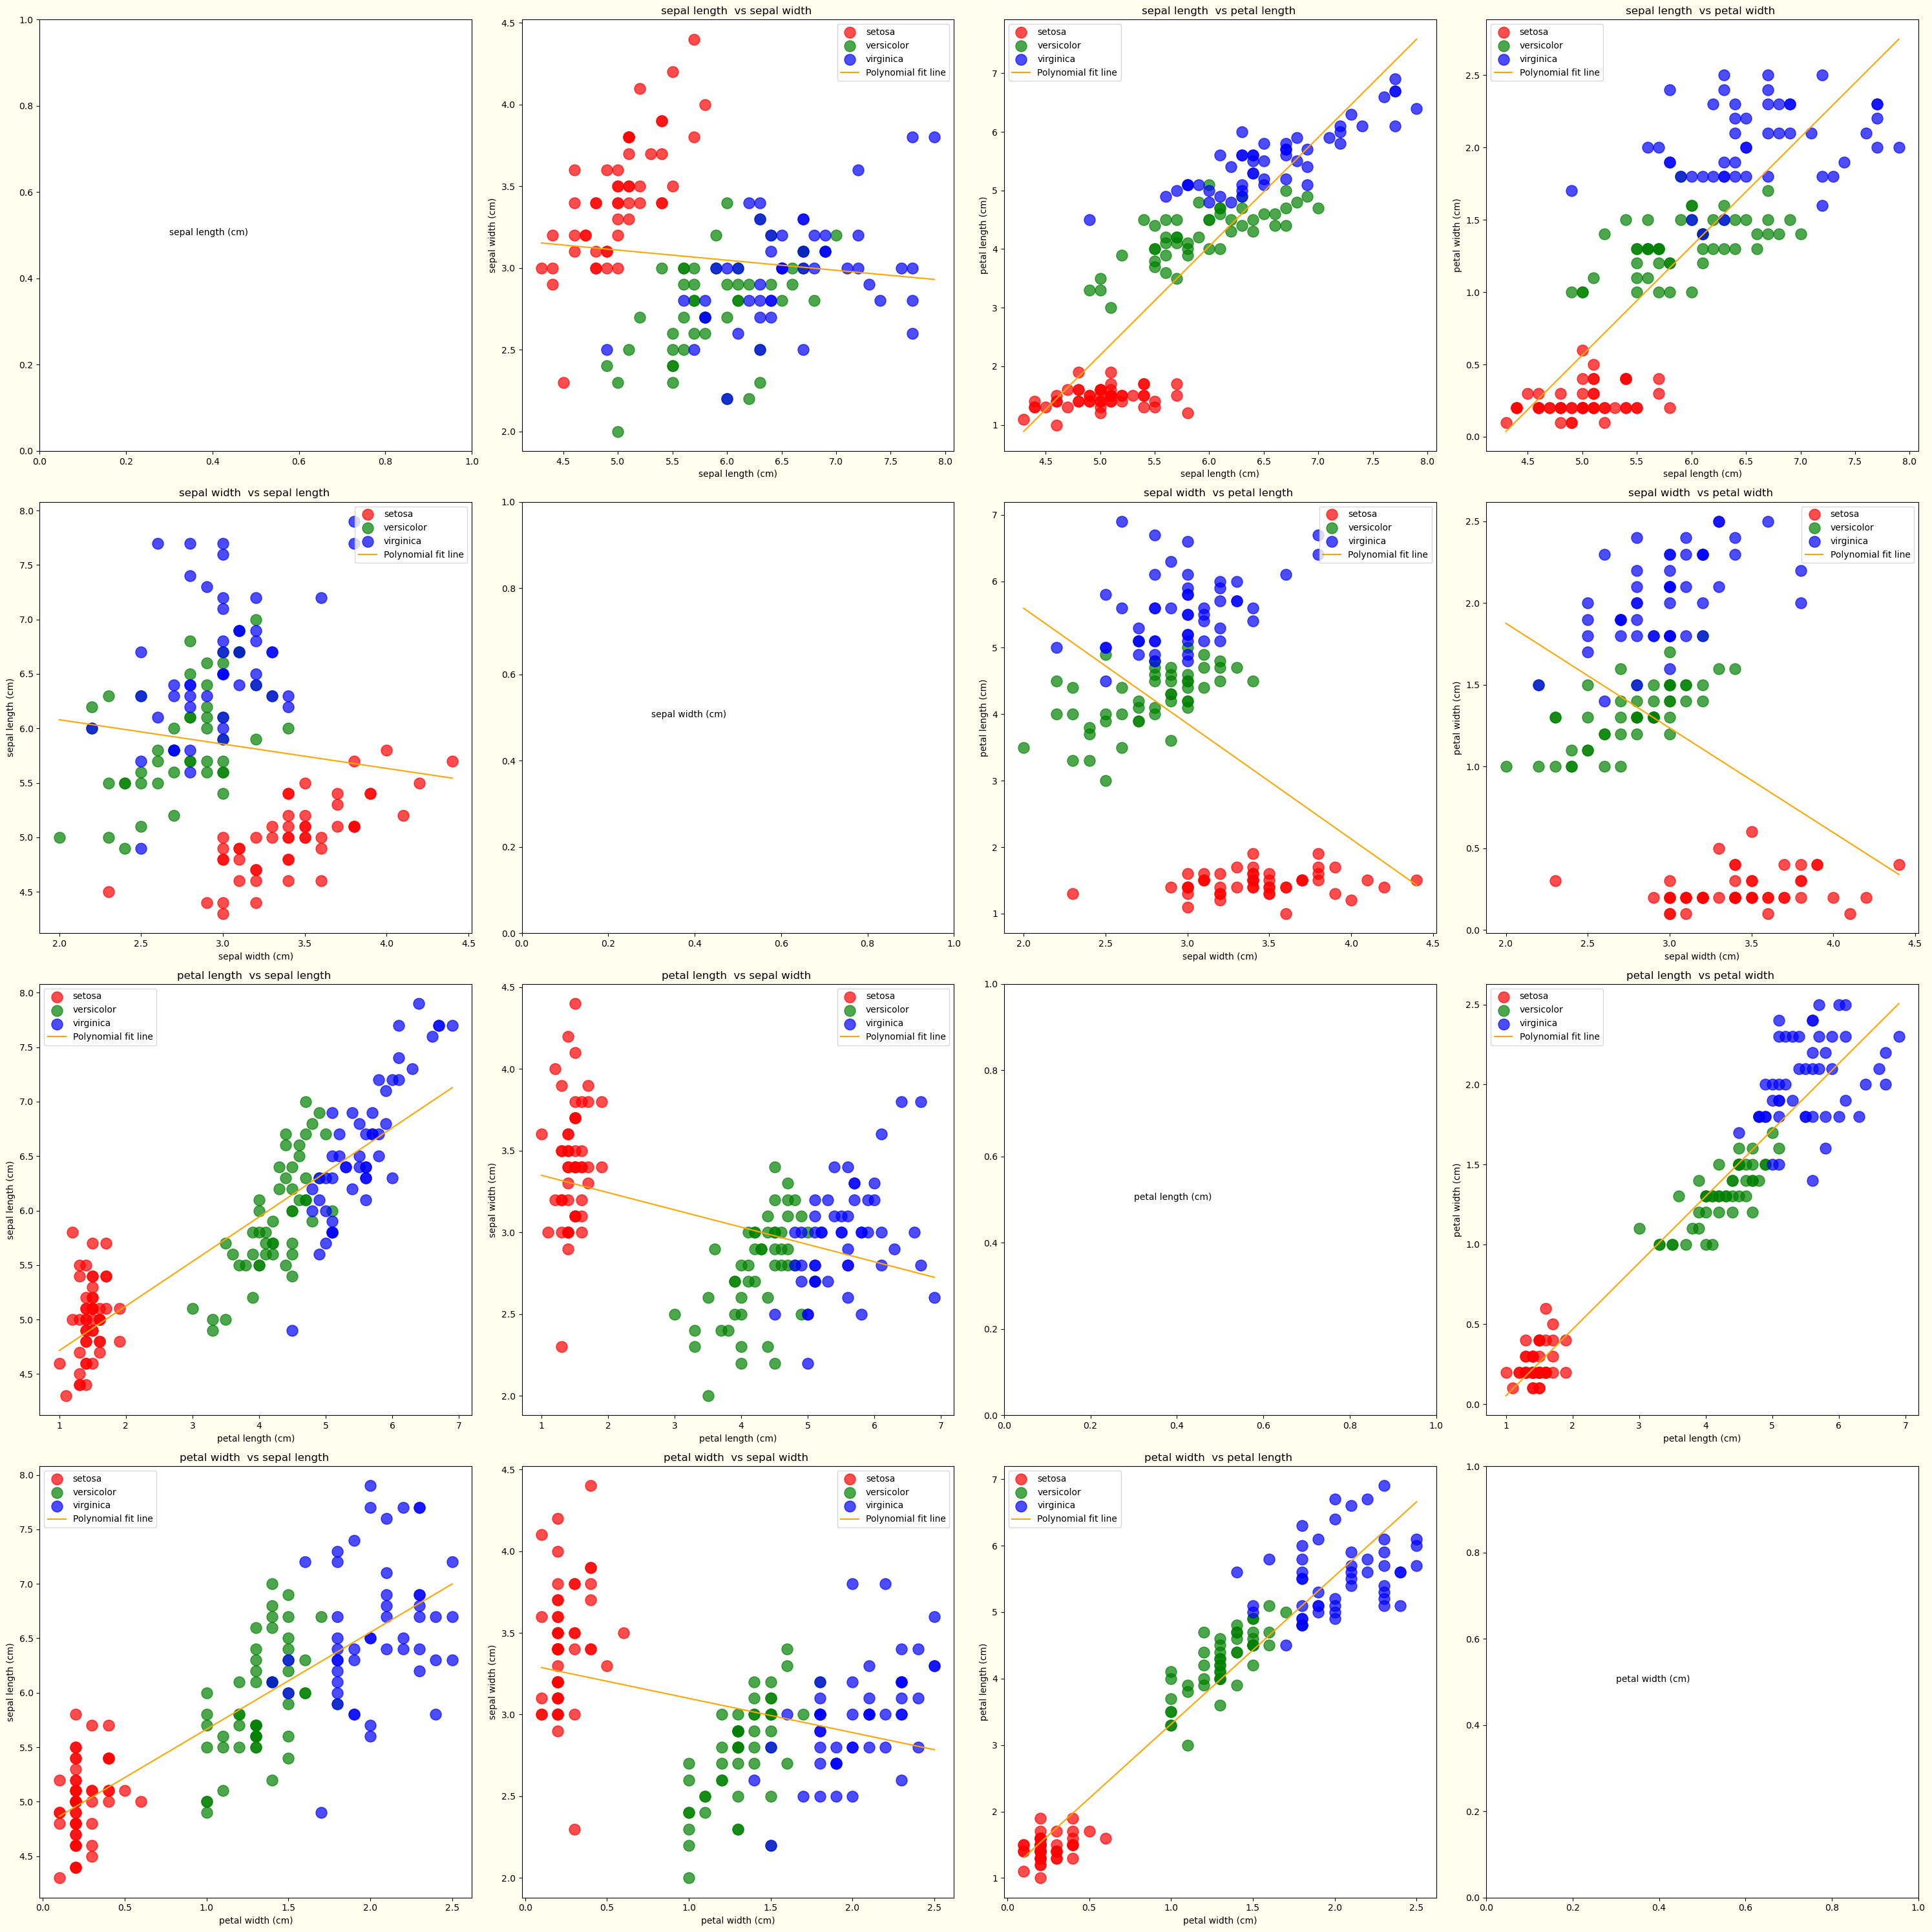

In [2]:
#import required modules 
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt

#load the Iris Dataset
ds_iris = ds.load_iris()



# Define the colors for the species
colors = ['red', 'green', 'blue']  # Color for Setosa, Versicolor, and Virginica
feature_names = ds_iris.feature_names
x_iris = ds_iris.data
y_iris = ds_iris.target

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

#plot scatter plot
# Loop through each pair of features and plot them
for i in range(4):
    for j in range(4):
        ax = axes[i, j] #select specific axis for plot within 4x4 grid
        if i == j:
            # (similar feature names) ... Just print feature name
            ax.text(0.3, 0.5, feature_names[i])
        else:
            # Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
            coefficients = np.polyfit(x_iris[:,i], x_iris[:,j], 1)
            polynomial = np.poly1d(coefficients)
            x_fit = np.linspace(min(x_iris[:,i]), max(x_iris[:,i]), 2)
            y_fit = polynomial(x_fit)
            # Plot each species with different colors
            for species in range(3):
                ax.scatter(x_iris[y_iris == species, i],  # feature i (x-axis)
                x_iris[y_iris == species, j],  # feature j (y-axis)
                color=colors[species],  # Color for the species
                label=ds_iris.target_names[species],  # Label for the species
                alpha=0.7,  # Set transparency
                marker = 'o',  # dot
                s=150)  # Size of the points

            # Plot the polynomial fit line
            ax.plot(x_fit, y_fit, color='orange', label='Polynomial fit line')

            #Axis labels, title, annotation, and background color
            ax.set_xlabel(ds_iris.feature_names[i])
            ax.set_ylabel(ds_iris.feature_names[j])
            ax.set_title(f'{ds_iris.feature_names[i].replace('(cm)', '')} vs {ds_iris.feature_names[j].replace('(cm)', '')}')
            ax.legend()

fig.set_facecolor('ivory')
plt.tight_layout()
plt.show()

Due to the localised clusters of "species" data, we should plot separate polyfit lines for each species

***
### Apply polyfit lines to each Iris "species" cluster

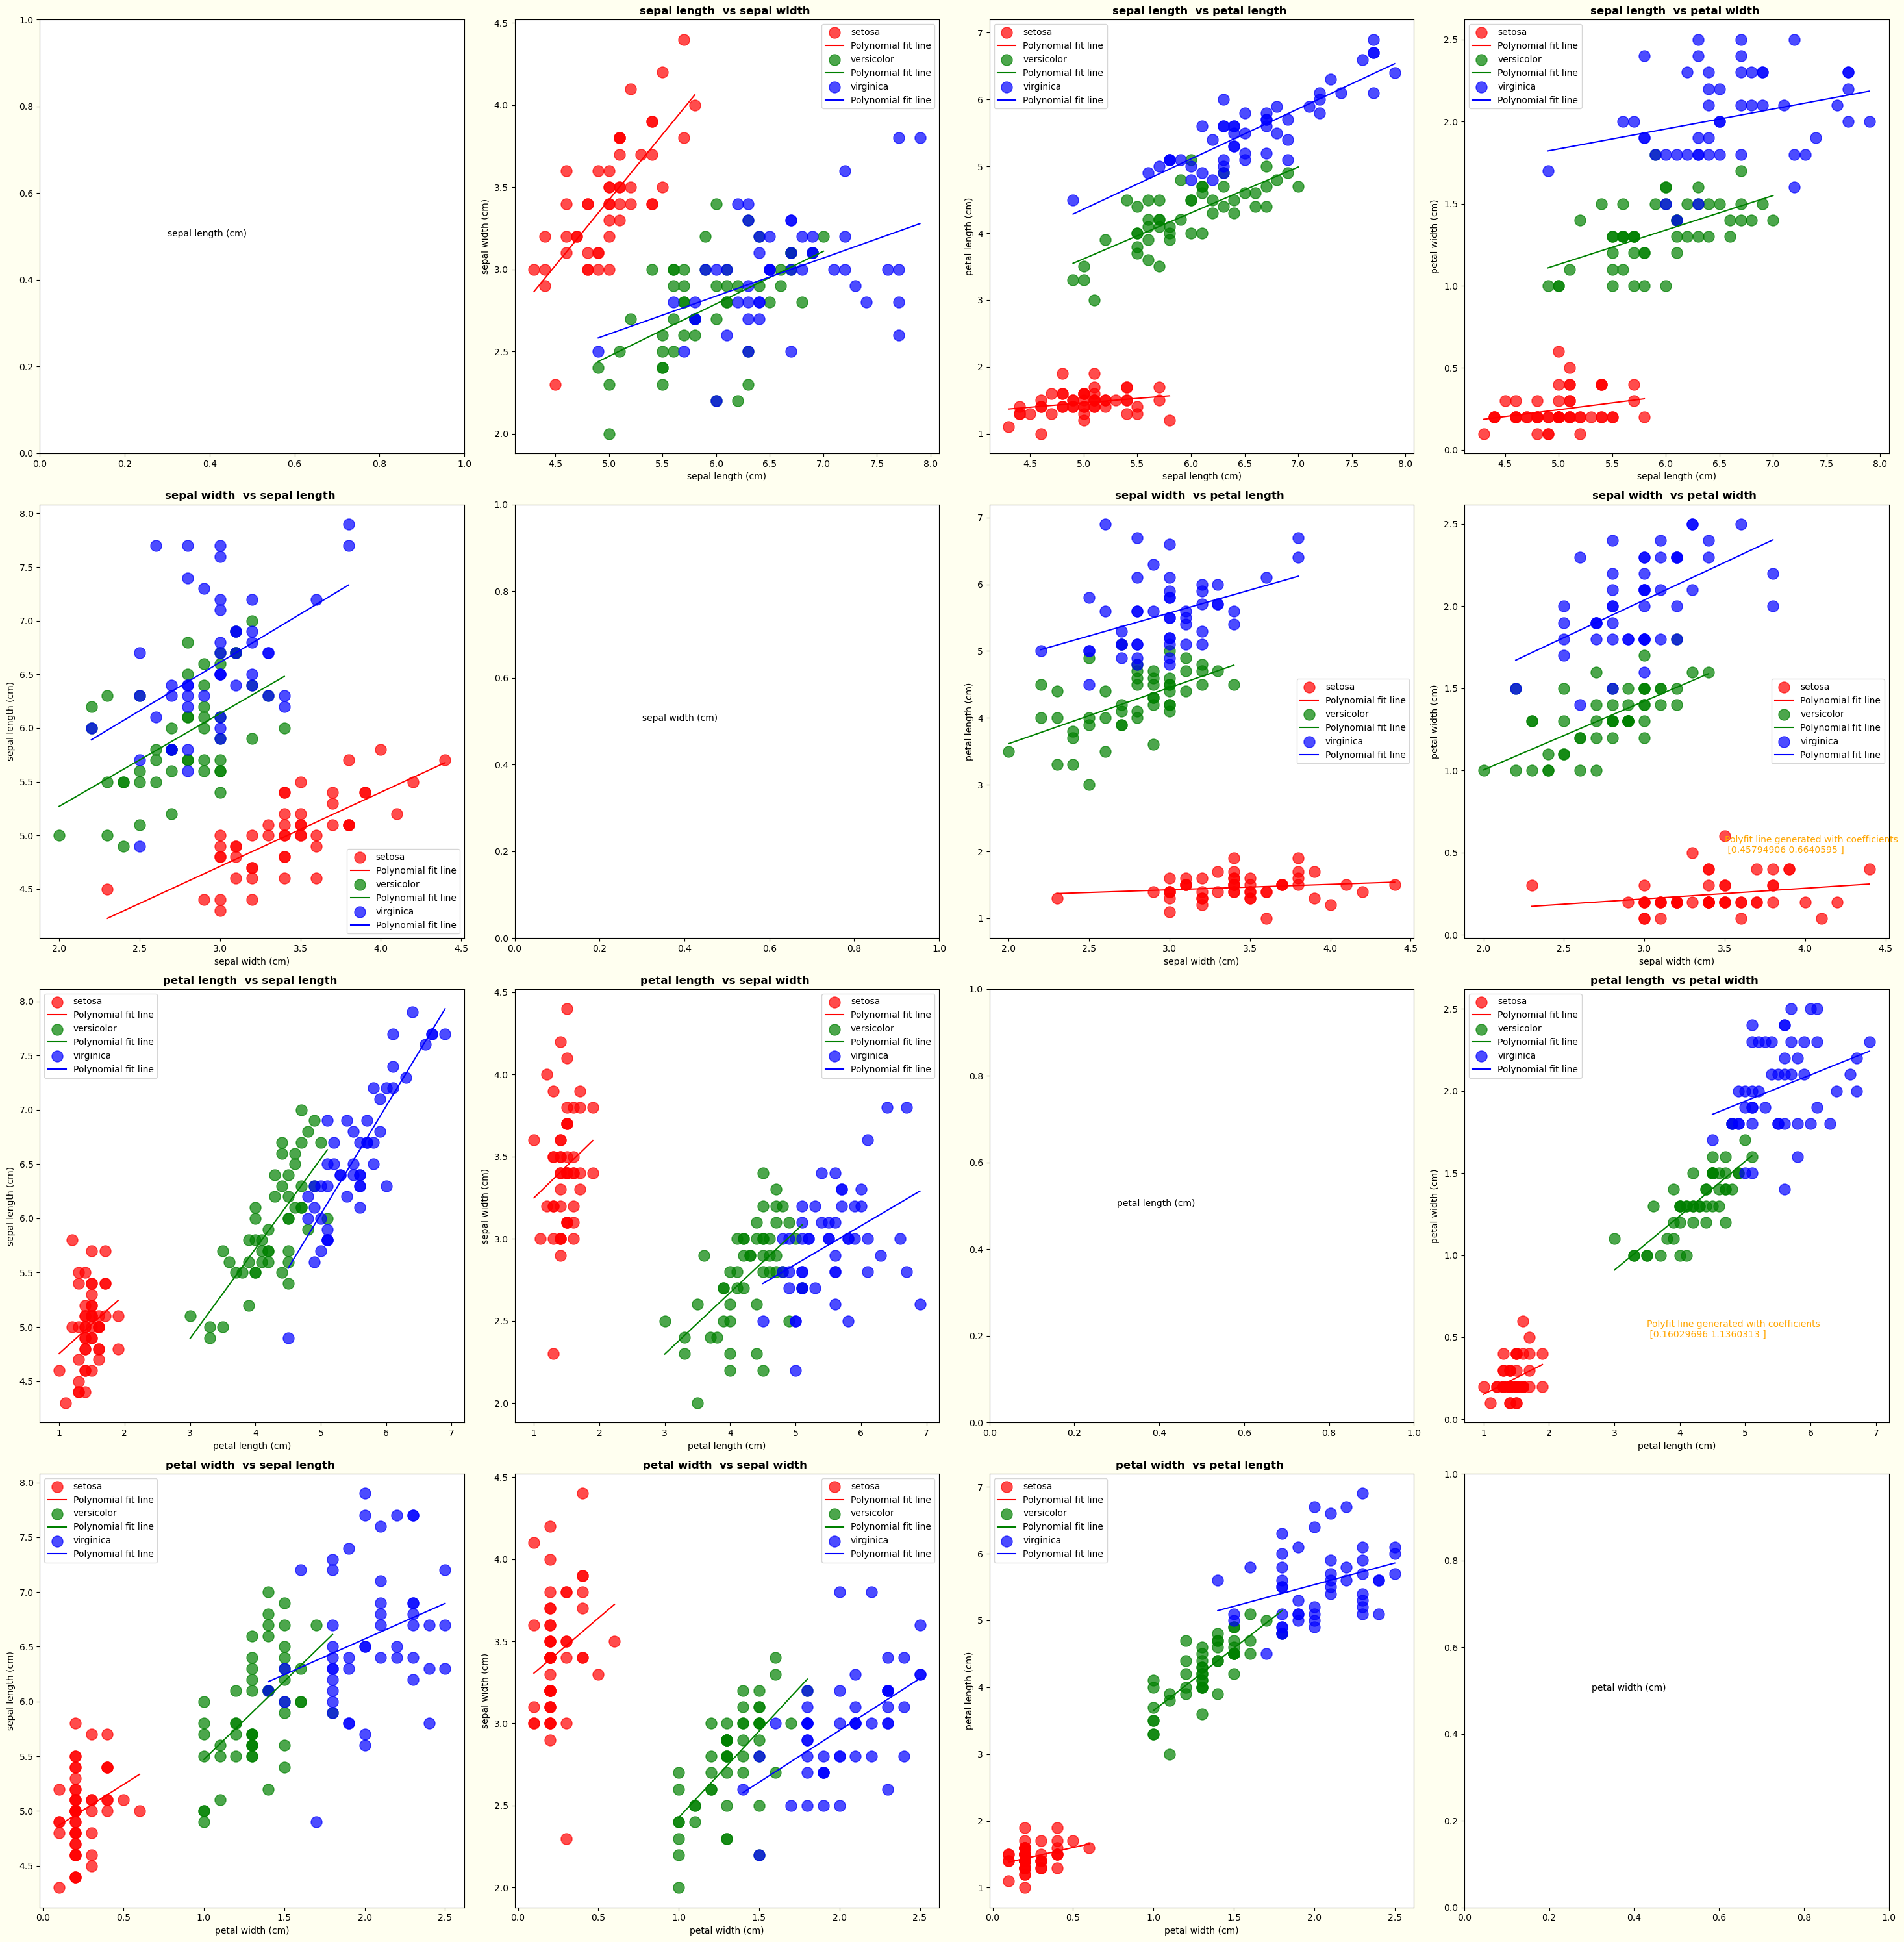

In [3]:
#import required modules 
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt

#load the Iris Dataset
ds_iris = ds.load_iris()

# Define the colors for the species
colors = ['red', 'green', 'blue']  # Array of Color for Setosa, Versicolor, and Virginica
feature_names = ds_iris.feature_names
x_iris = ds_iris.data
y_iris = ds_iris.target

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

#plot scatter plot
# Loop through each pair of features and plot them
for i in range(4):
    for j in range(4):
        ax = axes[i, j] #select specific axis for plot within 4x4 grid
        if i == j:
            # (similar feature names) ... Just print feature name
            ax.text(0.3, 0.5, feature_names[i])
        else:
            # Plot each species with different colors
            for species in range(3):
                # Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
                coefficients = np.polyfit(x_iris[y_iris == species,i], x_iris[y_iris == species,j], 1)
                polynomial = np.poly1d(coefficients)
                x_fit = np.linspace(min(x_iris[y_iris == species,i]), max(x_iris[y_iris == species,i]), 2)
                y_fit = polynomial(x_fit)
                ax.scatter(x_iris[y_iris == species, i],  # feature i (x-axis)
                x_iris[y_iris == species, j],  # feature j (y-axis)
                color=colors[species],  # Color for the species
                label=ds_iris.target_names[species],  # Label for the species
                alpha=0.7,  # Set transparency
                marker = 'o',  # dot
                s=150)  # Size of the points

                # Plot the polynomial fit line
                ax.plot(x_fit, y_fit, color=colors[species], label='Polynomial fit line')

            #Axis labels, title, annotation, and background color
            ax.set_xlabel(ds_iris.feature_names[i])
            ax.set_ylabel(ds_iris.feature_names[j])
            ax.set_title(f'{ds_iris.feature_names[i].replace('(cm)', '')} vs {ds_iris.feature_names[j].replace('(cm)', '')}', fontweight='bold')
            ax.annotate(f'Polyfit line generated with coefficients\n {coefficients}', xy=(3.5, 0.5), color='orange')
            ax.legend()

fig.set_facecolor('ivory')
plt.tight_layout()
plt.show()

For a final Python script for this stage of the Iris Analysis, I will repeat previous script from last stage with the addition of ployfit regression lines (for each species).
In this script I will avoid all the clutter from previous script where histograms will be plotted in the grid slots where feature pairs match.